Read in all the required packages

In [64]:
#import necessery libraries for future analysis of the dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import statsmodels.api as sm


import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import StandardScaler

#Task 1.Prepare the data,Rename variables & Propose Data Types

###Read in the txt file, manage the data so that it is ready for analysis

In [65]:
#read txt file and convert to dataframe
rawdata=pd.read_fwf('data.txt',encoding='unicode_escape')
df=pd.DataFrame(rawdata)

#split data by '|' to get three seperate columns--index,variable,value
df.columns =['Temp']
df[['index','variable','value']]=df['Temp'].str.split('|', expand=True)

#rearrange the columns,get rid of the invalid values
df['index'] = pd.to_numeric(df['index'],errors='coerce').fillna(-1).astype(int)
df =df[df['index']>=0]
del df['Temp']
df =df.set_index(df['index'])
del df['index']

#return the first five lines of data set and data summary infomation
print('The head of the dataframe is')
print(df.head())
print('\n')
print('The summary data info is shown below')
print(df.info())


The head of the dataframe is
      variable value
index               
0        score    65
1        score    98
2        score    85
3        score    83
4        score   115


The summary data info is shown below
<class 'pandas.core.frame.DataFrame'>
Int64Index: 2170 entries, 0 to 2169
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   variable  2170 non-null   object
 1   value     2170 non-null   object
dtypes: object(2)
memory usage: 50.9+ KB
None


###Check for missing values

In [66]:
df.isnull().sum()

variable    0
value       0
dtype: int64

###Since regresssion analysis would be performed, we must clean the data based off all variables and store it in a data frame & check for its information

In [67]:
data_regress = pd.DataFrame()

for i in df.variable.unique():
    data_regress[i] = (df[df.variable == i])['value'].values
    
print('The info on data_regress is shown below')
print(data_regress.info())

The info on data_regress is shown below
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 434 entries, 0 to 433
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   score   434 non-null    object
 1   h       434 non-null    object
 2   i       434 non-null    object
 3   w       434 non-null    object
 4   a       434 non-null    object
dtypes: object(5)
memory usage: 17.1+ KB
None


###According to the table above, we can see that the data types for all five vairables are String. We need to convert them from String to numeric data types for analytical needs.

#Task 2. Transform the data so that it is easy to analyze

###Perfrom one hot encoding for 'w' column because it is a categorical variable. One hot encoding is applied here because we will perfrom the explortary analysis and visualization. We should drop one dummy vaiable when it comes to linear regression in order to avoid multicollinearity.

In [68]:
#create dummy variable for 'w' category
dummies = pd.get_dummies(data_regress['w'])

In [69]:
#merge dummies to the dataframe
data_regress = pd.concat([data_regress,dummies],axis = 1)

In [70]:
#drop the 'w' column
data_regress.drop(['w'],inplace = True, axis = 1)
#check the revised dataframe
data_regress.head()

,score,h,i,a,1,2,3,4
0,65,1,'121.117528,27,0,0,0,1
1,98,1,'89.3618817,25,0,0,0,1
2,85,1,'115.443164,27,0,0,0,1
3,83,1,'99.4496394,25,0,0,1,0
4,115,1,'92.7457099,27,0,0,0,1


###Now we transform the data types. 'score' and 'i' are most suitable for floating point numbers as they stand for IQ scores. The remaining variables like age, work time and eudcation level can be used by integer types. 

In [71]:
#convert data types and round Mom's IQ value to two decimal places
data_regress['score'] = data_regress['score'].astype(float)

data_regress['h'] = data_regress['h'].astype(int)

data_regress['1'] = data_regress['1'].astype(int)

data_regress['2'] = data_regress['2'].astype(int)

data_regress['3'] = data_regress['3'].astype(int)

data_regress['4'] = data_regress['4'].astype(int)

data_regress['a'] = data_regress['a'].astype(int)

data_regress['i'] = (data_regress['i']
                     .apply(lambda x:round(np.float(x.replace("'","")),2)))


###Then we work on renaming the column names,substitute them to words for better understanding

In [72]:
data_regress.rename(mapper = {'i':'Mom_IQ','a':'Mom_Age','1':'NoWork_in_3year','2':'Work_in_2/3year','3':'Work_PT_1year',
                             '4':'Work_FT_1year','score':'Child_IQ','h':'Education'},axis = 1, inplace = True)
data_regress.head()

,Child_IQ,Education,Mom_IQ,Mom_Age,NoWork_in_3year,Work_in_2/3year,Work_PT_1year,Work_FT_1year
0,65.0,1,121.12,27,0,0,0,1
1,98.0,1,89.36,25,0,0,0,1
2,85.0,1,115.44,27,0,0,0,1
3,83.0,1,99.45,25,0,0,1,0
4,115.0,1,92.75,27,0,0,0,1


#Task 3. Perform the exploratory data analysis

###We first check the statistical measures of all variables

In [73]:
data_regress.describe()

,Child_IQ,Education,Mom_IQ,Mom_Age,NoWork_in_3year,Work_in_2/3year,Work_PT_1year,Work_FT_1year
count,434.000000,434.000000,434.000000,434.000000,434.000000,434.000000,434.000000,434.000000
mean,86.797235,0.785714,100.000092,22.785714,0.177419,0.221198,0.129032,0.472350
std,20.410688,0.410799,15.000042,2.701070,0.382464,0.415533,0.335623,0.499811
min,20.000000,0.000000,71.040000,17.000000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,1.000000,88.660000,21.000000,0.000000,0.000000,0.000000,0.000000
50%,90.000000,1.000000,97.920000,23.000000,0.000000,0.000000,0.000000,0.000000
75%,102.000000,1.000000,110.272500,25.000000,0.000000,0.000000,0.000000,1.000000
max,144.000000,1.000000,138.890000,29.000000,1.000000,1.000000,1.000000,1.000000


* Categorical Data: 
 -  Education
 -  NoWork_in_3year
 -  Work_in_2/3year
 -  Work_PT_1year
 -  Work_FT_1year

* Numerical Data:
 -  Child_IQ
 -  Mom_IQ
 -  Mom_Age

###Let's move on to visualizaiton

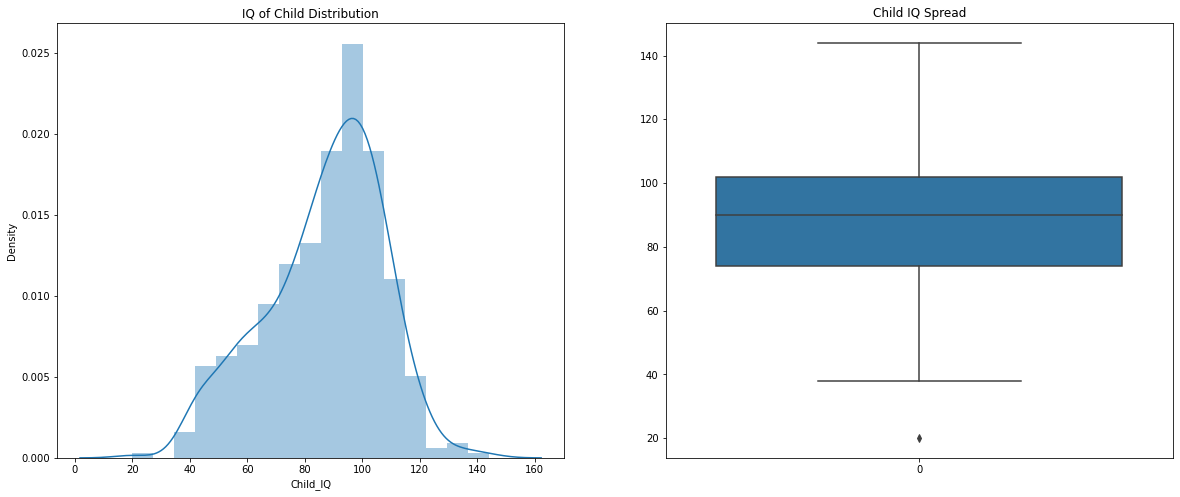

In [74]:
# Distribution of Child IQ value
plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
plt.title('IQ of Child Distribution')
sns.distplot(data_regress['Child_IQ'])

plt.subplot(1,2,2)
plt.title('Child IQ Spread')
sns.boxplot(data_regress['Child_IQ'])
plt.show()

####From the graph above, the child IQ distbution is left-skewed. It occurs when there is a higher boundary in the data set. About 75% of Child IQ is greater than 75. 

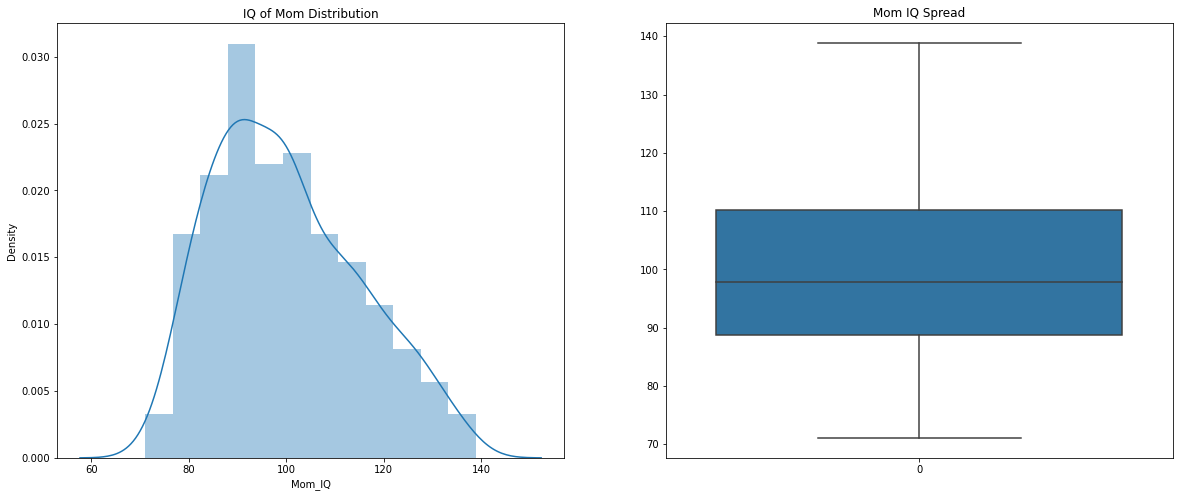

In [75]:
# Distribution of Mom IQ value
plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
plt.title('IQ of Mom Distribution')
sns.distplot(data_regress['Mom_IQ'])

plt.subplot(1,2,2)
plt.title('Mom IQ Spread')
sns.boxplot(data_regress['Mom_IQ'])
plt.show()

####From the graph above, the mom's IQ distribution is right-skewed. That means the outliers of the distribution curve are further out towards the right. Around 75% of mom's IQ is greater than 90.

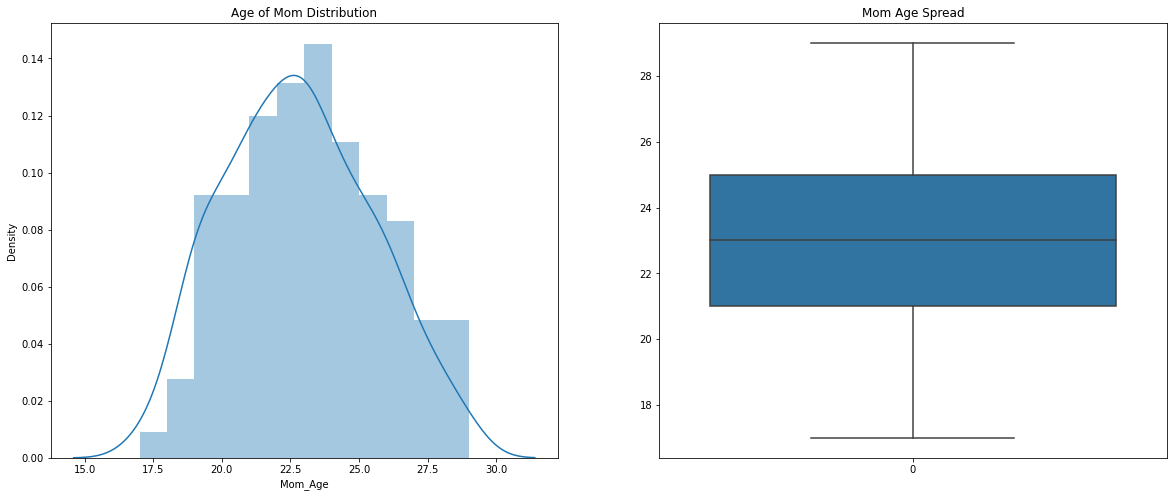

In [76]:
# Distribution of Mom age value
plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
plt.title('Age of Mom Distribution')
sns.distplot(data_regress['Mom_Age'])

plt.subplot(1,2,2)
plt.title('Mom Age Spread')
sns.boxplot(data_regress['Mom_Age'])
plt.show()

####From the graph, the mon's age seems to be normally distrubuted. Around 75% of Mom age is greater than 21. 

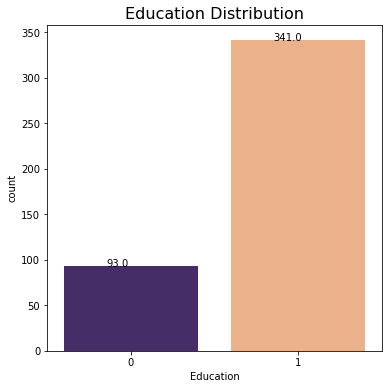

In [77]:
# Education count plot
plt.figure(figsize=(6,6))
ax = sns.countplot(x='Education', data=data_regress,palette=['#432371',"#FAAE7B"])
#display the count values on the plot

for p in ax.patches:
   ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))
    
plt.title('Education Distribution',fontsize = 16)
plt.show()

####According to the count plot, there are 341 mom completed high school and only 93 of them did not complete.

In [78]:
#Plot interactive graph for mom's work time
import plotly.graph_objects as go
L= len(data_regress)
fig1 = go.Figure(data=[go.Bar(x=['NoWork_in_3year',  'Work_in_2/3year', 'Work_PT_1year','Work_FT_1year'], 
                              y =[data_regress['NoWork_in_3year'].sum(),
                                  data_regress['Work_in_2/3year'].sum(),
                                  data_regress['Work_PT_1year'].sum(),
                                  data_regress['Work_FT_1year'].sum()], 
                                  name='True'),
                       go.Bar(x=['NoWork_in_3year',  'Work_in_2/3year', 'Work_PT_1year','Work_FT_1year'], 
                              y =[L-data_regress['NoWork_in_3year'].sum(),
                                  L-data_regress['Work_in_2/3year'].sum(), 
                                  L-data_regress['Work_PT_1year'].sum(), 
                                  L-data_regress['Work_FT_1year'].sum()], 
                                  name='False')])
fig1.update_layout(title_text = 'Work Time of Mom During Childs Life',barmode='stack', bargap=0.07, width=600, height=400)


####From the graph, we can tell that the majority of mothers worked full-time in first year child's life. Only 56 of them worked part-time in first year which is the least proportion among these four.

###Let's create a pairplot to plot pairwise relationship among these numerical variables

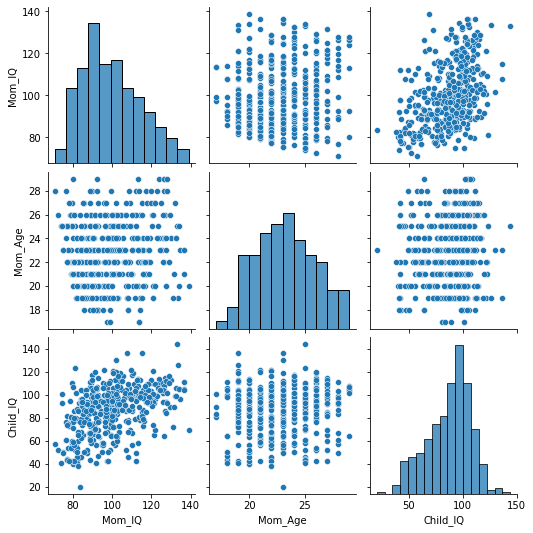

In [79]:
num_col = ['Mom_IQ', 'Mom_Age','Child_IQ']
sns.pairplot(data_regress[num_col])

####Based off the pairplot, Mom_IQ seems to be the most correlated feature with Child_IQ. Let's proceed to plot a jointplot to see if the linear relationship between Mom's IQ and Child's IQ makes sense.

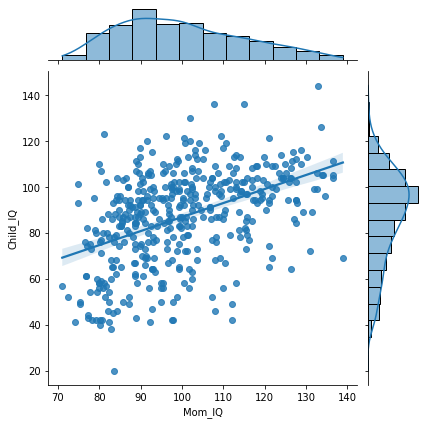

In [80]:
#Jointplot between Mom IQ and Child IQ
sns.jointplot(data=data_regress, x='Mom_IQ', y='Child_IQ',kind='reg')

####After fitting a regression line, even these relatively noisy data have a significant trend. As Mom_IQ increases, the Child_IQ also increase. But the spread of the data points around the predicted mean at any given location along the regression line are expected to be large. 

###Let's visualize the categorical data

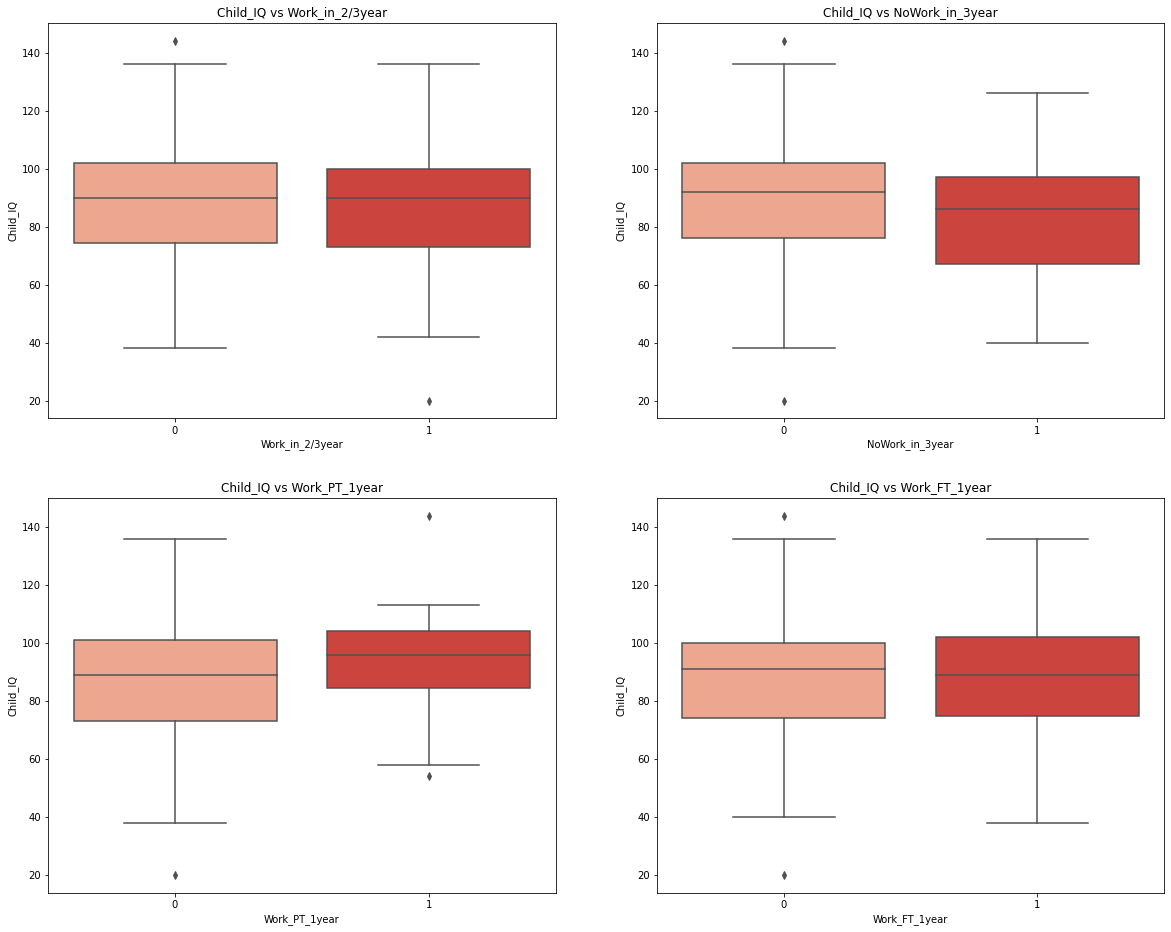

In [81]:
#Create boxplots for Work Time
plt.figure(figsize=(20,16))

plt.subplot(2,2,1)
plt.title('Child_IQ vs Work_in_2/3year')
sns.boxplot(x=data_regress['Work_in_2/3year'], y=data_regress['Child_IQ'], palette=("Reds"))

plt.subplot(2,2,2)
plt.title('Child_IQ vs NoWork_in_3year')
sns.boxplot(x=data_regress['NoWork_in_3year'], y=data_regress['Child_IQ'], palette=("Reds"))

plt.subplot(2,2,3)
plt.title('Child_IQ vs Work_PT_1year')
sns.boxplot(x=data_regress['Work_PT_1year'], y=data_regress['Child_IQ'], palette=("Reds"))

plt.subplot(2,2,4)
plt.title('Child_IQ vs Work_FT_1year')
sns.boxplot(x=data_regress['Work_FT_1year'], y=data_regress['Child_IQ'], palette=("Reds"))



####From the graph above, we can see that whether or not mom 'Work in second/third year' and 'Work full time in first year' do not show an obvious difference on child IQ. However, mom who do not work in first three years and who work part time in first year, their child IQ have a smaller range. This may due to we have limited sample size for these two categories. 

###Create a correlation heatmap to visualize correlation between variables

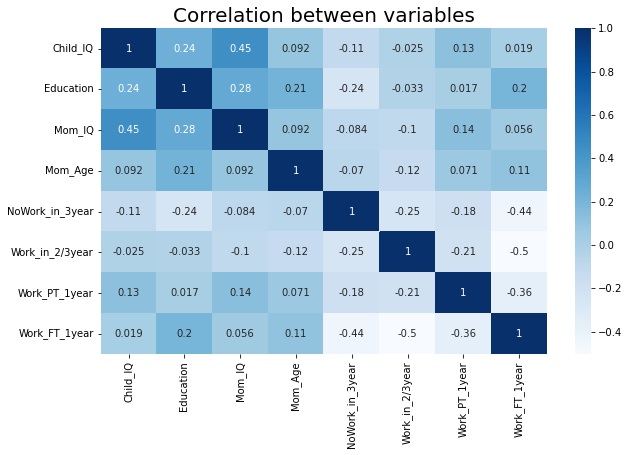

In [82]:
#correlation heatmap
plt.figure(figsize=(10,6))
sns.heatmap(data_regress.corr(method = 'pearson'), annot = True,cmap = 'Blues')
ax = plt.axes()
ax.set_title('Correlation between variables',fontsize = 20)
plt.show()

####From the correlation heatmap, it is obvious that 'Education' and 'Mom IQ' are strongly correlate to 'Child IQ'. 'Mom_IQ','Mom_Age' and 'Work_FT_1year' correlate to 'Education'. However, correlation does not necessarily imply causation. We will continue to build linear regression models to validate it.

#Task 4. Perform Linear Regression

##a. Start with using a single predictor:

###We are going to perform Ordinary Least Squares regression to each single prerdictor at a time. Followed by that, we will analyze the model's statistics, specifically look at R-squared/Adujusted R sqauared and P-value to evaluate performance.

In [83]:
data_regress.columns

Index(['Child_IQ', 'Education', 'Mom_IQ', 'Mom_Age', 'NoWork_in_3year',
       'Work_in_2/3year', 'Work_PT_1year', 'Work_FT_1year'],
      dtype='object')

In [84]:
pred_single = ['Education', 'Mom_IQ', 'Mom_Age', 'NoWork_in_3year',
       'Work_in_2/3year', 'Work_PT_1year', 'Work_FT_1year']

for _ in pred_single:
    y = data_regress['Child_IQ']
    x_variables = sm.add_constant(data_regress[_])
    model_ = sm.OLS(y, x_variables, missing = 'drop').fit()
    print(f"{_}'s model result is shown below'")
    print(model_.summary())
    print('\n')

Education's model result is shown below'
                            OLS Regression Results                            
Dep. Variable:               Child_IQ   R-squared:                       0.056
Model:                            OLS   Adj. R-squared:                  0.054
Method:                 Least Squares   F-statistic:                     25.69
Date:                Thu, 01 Dec 2022   Prob (F-statistic):           5.96e-07
Time:                        15:35:22   Log-Likelihood:                -1911.8
No. Observations:                 434   AIC:                             3828.
Df Residuals:                     432   BIC:                             3836.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      

####According to the model statistics from above, 'Education','Mom_IQ','Work_PT_1year','NoWork_in_3year' outperfrom other variables. Their P values are significant(less than 0.05) and R-squared are relatively high-showing good sign for fitting.

##b. Using multiple predictors

###Before proceed to multiple linear regression, we need to drop one dummy variable to avoid multicollinearity.

In [85]:
multi_regress = data_regress.drop('Work_PT_1year',axis =1)
#check the head of new data frame
multi_regress.head()

,Child_IQ,Education,Mom_IQ,Mom_Age,NoWork_in_3year,Work_in_2/3year,Work_FT_1year
0,65.0,1,121.12,27,0,0,1
1,98.0,1,89.36,25,0,0,1
2,85.0,1,115.44,27,0,0,1
3,83.0,1,99.45,25,0,0,0
4,115.0,1,92.75,27,0,0,1


In [86]:
multi_regress.columns

Index(['Child_IQ', 'Education', 'Mom_IQ', 'Mom_Age', 'NoWork_in_3year',
       'Work_in_2/3year', 'Work_FT_1year'],
      dtype='object')

###We will perfrom backward elimination as the variable selection method. The procedure of backward stepwise selection would be to start from all predictiors and drop one most insignificant input at a time to see model's performance.Consider we only have a relatively small group of predictors, we will perfrom it manually. 

In [87]:
#Build regression model function
def build_model(X,y):
    X = sm.add_constant(X) #Adding the constant
    lm = sm.OLS(y,X,missing = 'drop').fit() # fitting the model
    print("Regression result is shown below")
    print(lm.summary()) # model summary
    return X

In [88]:
#Model one-include all predictors
x_var = multi_regress.drop(['Child_IQ'], axis = 1)
y_var = multi_regress['Child_IQ']
test_model = build_model(x_var,y_var)

Regression result is shown below
                            OLS Regression Results                            
Dep. Variable:               Child_IQ   R-squared:                       0.221
Model:                            OLS   Adj. R-squared:                  0.210
Method:                 Least Squares   F-statistic:                     20.22
Date:                Thu, 01 Dec 2022   Prob (F-statistic):           7.53e-21
Time:                        15:35:35   Log-Likelihood:                -1870.0
No. Observations:                 434   AIC:                             3754.
Df Residuals:                     427   BIC:                             3783.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const    

####From the result, p-value of 'Mom_Age'(0.517)is much higher than the significance value of 0.05. Hence we drop this variable first and move on to the second model.

In [89]:
#Model after dropping Mom's age
x_var = x_var.drop(['Mom_Age'], axis = 1)
test_model = build_model(x_var,y_var)

Regression result is shown below
                            OLS Regression Results                            
Dep. Variable:               Child_IQ   R-squared:                       0.221
Model:                            OLS   Adj. R-squared:                  0.211
Method:                 Least Squares   F-statistic:                     24.22
Date:                Thu, 01 Dec 2022   Prob (F-statistic):           1.77e-21
Time:                        15:35:39   Log-Likelihood:                -1870.2
No. Observations:                 434   AIC:                             3752.
Df Residuals:                     428   BIC:                             3777.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const    

####The R-squared remain the same as first model, but the adjusted R-suqared improved from 0.210 to 0.211 which is a good sign. This time, 'Work_in_2/3year' has the highest p-value(0.377>0.05) and would be eliminate. 

In [90]:
#Model after dropping 'work in 2/3 year'
x_var = x_var.drop(['Work_in_2/3year'], axis = 1)
test_model = build_model(x_var,y_var)

Regression result is shown below
                            OLS Regression Results                            
Dep. Variable:               Child_IQ   R-squared:                       0.219
Model:                            OLS   Adj. R-squared:                  0.212
Method:                 Least Squares   F-statistic:                     30.09
Date:                Thu, 01 Dec 2022   Prob (F-statistic):           4.40e-22
Time:                        15:35:43   Log-Likelihood:                -1870.6
No. Observations:                 434   AIC:                             3751.
Df Residuals:                     429   BIC:                             3772.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const    

####R-squared of the model decreased as expected(less variables in the model) but adjusted R-squared increased(meaning more proportion of data are explained). This time, 'Work_FT_1year' has the highest p-value(0.219>0.05) and would be eliminate. 

In [91]:
#Model after dropping 'work ft 1 year'
x_var = x_var.drop(['Work_FT_1year'], axis = 1)
test_model = build_model(x_var,y_var)

Regression result is shown below
                            OLS Regression Results                            
Dep. Variable:               Child_IQ   R-squared:                       0.216
Model:                            OLS   Adj. R-squared:                  0.211
Method:                 Least Squares   F-statistic:                     39.57
Date:                Thu, 01 Dec 2022   Prob (F-statistic):           1.34e-22
Time:                        15:35:46   Log-Likelihood:                -1871.4
No. Observations:                 434   AIC:                             3751.
Df Residuals:                     430   BIC:                             3767.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const    

####R-squared of the model continue to decrease and adjusted R-squared falls back to 0.211. This time, 'NoWork_in_3year' has the highest p-value(0.275>0.05) and would be eliminate. 

In [92]:
#Model after dropping 'No work in 3 year'
x_var = x_var.drop(['NoWork_in_3year'], axis = 1)
test_model = build_model(x_var,y_var)

Regression result is shown below
                            OLS Regression Results                            
Dep. Variable:               Child_IQ   R-squared:                       0.214
Model:                            OLS   Adj. R-squared:                  0.211
Method:                 Least Squares   F-statistic:                     58.73
Date:                Thu, 01 Dec 2022   Prob (F-statistic):           2.78e-23
Time:                        15:35:50   Log-Likelihood:                -1872.0
No. Observations:                 434   AIC:                             3750.
Df Residuals:                     431   BIC:                             3762.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         25.72

####Now we have all the significant inputs and an accpetable R-squared for our final model. We will continue to improve it by adding an interaction item.

##c. Using Multiple Predictiors with an Interaction Term

###We first want to decide which interaction term to use. Acoording to our final model, it is reasonable to check if the interaction between 'Education' and 'Mom_IQ' actually make sense.

###First we create a boxplot between 'Education' and 'Mom_IQ'

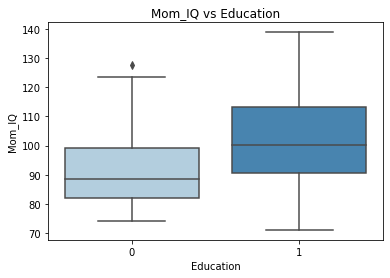

In [93]:
# Distribution of Education vs. Mom IQ value

plt.title('Mom_IQ vs Education')
sns.boxplot(x=data_regress['Education'], y=data_regress['Mom_IQ'], palette=("Blues"))

####According to the boxplot, of those mothers who graduated from high school, their IQ range is much larger and the median is around 100 while the median of those who did not graduate from high school is 90. It is possible that mom who have higher IQ is more likely to complete high school.

###Let's visualize how Mom_IQ and Child_IQ distribute under different Education group.

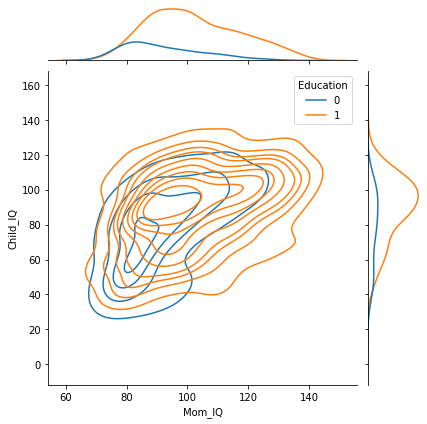

In [96]:
sns.jointplot(data=multi_regress, x='Mom_IQ', y='Child_IQ',hue='Education',kind="kde")

####From the Kde plot, we can have a more comprehensive idea about the probability density difference among Education. Those who did not complete high school, both mom IQ and their child IQ tend to aggregrate in the lower center. One possible hypothesis would be: of those who did not complete high school, mom IQ tend to be lower which lead to lower child's IQ. 

###Let's plot an interaction plot for Mom and Child IQ under different education group

Text(0.5, 1.0, 'Mom IQ vs Child IQ under Education')

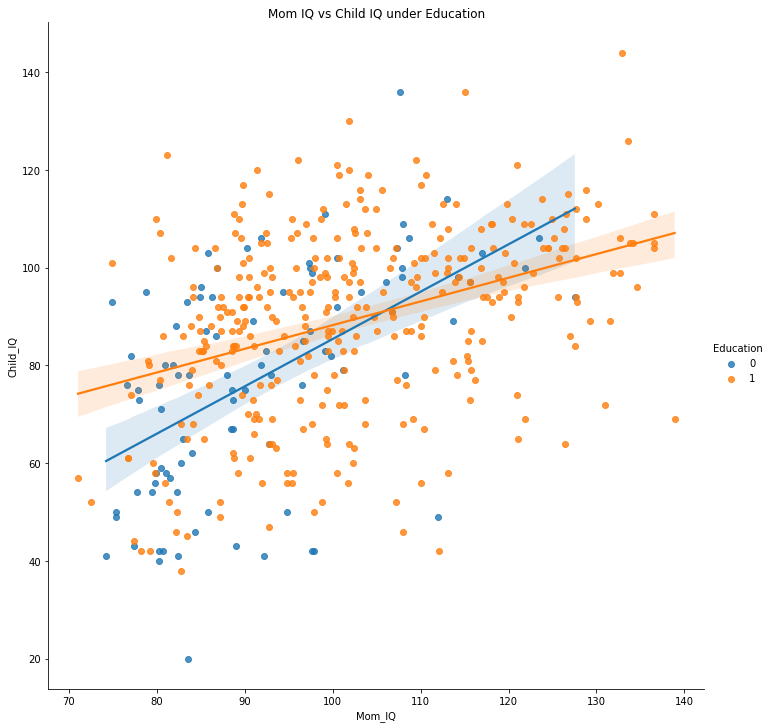

In [97]:
# add regression line for Mom IQ vs. CHild IQ per Education group
sns.lmplot(x="Mom_IQ", 
           y="Child_IQ", 
           hue="Education",
           data=multi_regress,
           height=10)
plt.xlabel("Mom_IQ")
plt.ylabel("Child_IQ")
plt.title("Mom IQ vs Child IQ under Education")

####From the interaction plot, the lines are not parallel. This indicates the Mom's IQ is different for who has completed high school than it is for those who did not complete high school. 

###Based on the analysis, it is reasonable to choose 'Education' and 'Mom_IQ' as interaction term and implement to the multiple linear regression model.

In [98]:
#Assign interaction term to the model
x_var['Interaction'] = x_var['Education'] * x_var['Mom_IQ']
inter_model = build_model(x_var,y_var)

Regression result is shown below
                            OLS Regression Results                            
Dep. Variable:               Child_IQ   R-squared:                       0.230
Model:                            OLS   Adj. R-squared:                  0.225
Method:                 Least Squares   F-statistic:                     42.84
Date:                Thu, 01 Dec 2022   Prob (F-statistic):           3.06e-24
Time:                        15:36:51   Log-Likelihood:                -1867.5
No. Observations:                 434   AIC:                             3743.
Df Residuals:                     430   BIC:                             3759.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const         -11

####From the result, both R-squared and adjusted R-Sqaured increase which indicate that model is a better fit with interaction term. Additionally, all p-values are less than 0.05 meaning the predictors are all significant. 

###Let's evaluate our model's ability to predict future cognitive test scores by cross-validation 

###First,prepare the train and test data by train_test_split

In [99]:
x = x_var[['Education', 'Mom_IQ', 'Interaction']]
y = multi_regress['Child_IQ']

#split the data into train and test set
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state = 101)

###Fit our model to training data

In [100]:
#Train the model on the training data
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(x_train,y_train)

#Print out the coefficients of the model
lm.coef_

array([38.64669426,  0.85735923, -0.35939784])

###Now that we have fit our model, let's evaluate its performance by predicting off the test values

In [101]:
#Make predictions
predictions = lm.predict(x_test)

###Create a scatter plot of the real test values versus the predicted values

Text(0.5, 1.0, 'Predicted vs. Test')

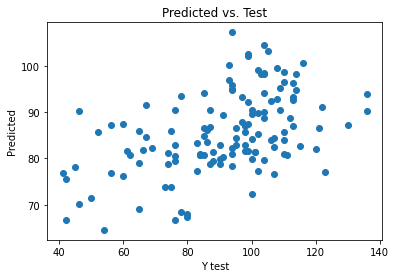

In [102]:
plt.scatter(y_test,predictions)
plt.xlabel('Y test')
plt.ylabel('Predicted')
plt.title('Predicted vs. Test')

####The scatter plots seems not to be perfectly linear. This may due to our test size is too small.

###Let's evaluate our model performance by calculating the residual sum of squares and the explained variance score(R^2)

In [103]:
#Calculate the Mean Absolute Error, Root Mean Squared Error
from sklearn import metrics
print('MAE', metrics.mean_absolute_error(y_test,predictions))
print('RMSE', np.sqrt(metrics.mean_squared_error(y_test,predictions)))

MAE 14.987302033796661
RMSE 18.55930547064709


####We want MAE and RMSE to be lower, so that the better the model fits a dataset.This model produces 14.987 MAE and 18.897 RMSE which is acceptable.

In [104]:
#R-squared 
metrics.explained_variance_score(y_test,predictions)

0.2358490494359513

####R-squared shows how much percentage of dataset the model has explained. In our model, it is 23.58% which is not ideal for a good predictive model.

### Continue to analyze the residuals, make sure everything was okay with the data

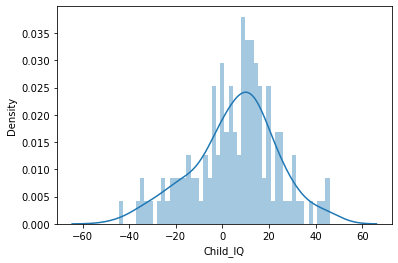

In [105]:
#Get the residuals distribution plot
sns.distplot((y_test-predictions),bins = 50)

####From the residual plot, it seems to be normally distributed which is a good sign.

###Now let's interprete the coefficients

In [106]:
cdf = pd.DataFrame(lm.coef_, x.columns, columns=['Coeff'])
cdf

,Coeff
Education,38.646694
Mom_IQ,0.857359
Interaction,-0.359398


#### From the coefficient output, we can see that the regression coefficient for Education is 38.646. This means that ,on average, a mom who completed high school, her child IQ would be 38.646 higher compared to a child's mother who did not completed high school, assuming other predicor variable remain same. As for the mom IQ, this means that on average, each additional one unit increase of mom IQ score is associated with an increase of 0.857 scores on the child IQ, assumnig other predictor variable remain same.  For the interaction term, it suggests that as interaction increases, the child IQ tends to decrease.

#Conclusion

####Overall, the multiple linear regression model that takes into 'Education','Mom_IQ' and interaction term as 'Education'*'Mom_IQ' outperfrom any other regression models. However, this model does not have a good ability to predict new data. This may due to 
-  The sample size being too small 
-  Not sufficient effective predictors


####We tend to assume that IQ would be determined by genetics. However,there are other objectives that could make impact on the IQ during child's development like home environment, healthcare condition and learning rescources.My suggestion would be to perfrom:
-  Demographic segmentation: divide the sample by income/education level
-  Geographic segmentation: different regions may means different access to education rescources
-  Child health conditions: other health conditions may affect IQ development 

####In this way, we will improve the overall efficiency of the model by adding more features and expanded sample size.